<a href="https://colab.research.google.com/github/kridtapon/BandEdge-Strategy/blob/main/BandEdge_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vectorbt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00
  Created wheel for vectorbt: filename=vectorbt-0.26.2-py3-none-any.whl size=527326 sha256=fa5aec1b638fb6a1720542817f6058ec71b74dcca91893ae972f434ec0656729
  Stored in directory: /root/.cache/pip/wheels/35/a3/d2/ae1a8cbf659fffc7d1890123df1a7fa2e7f6df587c1dca71cd
Successfully built vectorbt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
     

In [ ]:
import pandas as pd
import vectorbt as vbt
import numpy as np
import yfinance as yf

In [ ]:
def calculate_bollinger_bands(df, window=20, num_std=2):
    """Calculate Bollinger Bands manually."""
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()

    # Upper and lower Bollinger Bands
    df['BB_Upper'] = rolling_mean + (num_std * rolling_std)
    df['BB_Lower'] = rolling_mean - (num_std * rolling_std)
    return df

def main():
    # Define the stock symbol and time period
    symbol = 'GC=F'
    start_date = '2014-01-01'
    end_date = '2024-01-01'

    # Download the data
    df = yf.download(symbol, start=start_date, end=end_date)
    df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    df.ffill(inplace=True)

    # Calculate Bollinger Bands
    df = calculate_bollinger_bands(df, window=24, num_std=2.5)

    # Define entry signal
    df['Entry'] = (
        (df['Close'] < df['BB_Lower'])
    )

    # Define exit signal
    df['Exit'] = df['Close'] > df['BB_Upper']  # Exit when price reaches upper Bollinger Band

    # Convert signals to boolean arrays
    entries = df['Entry'].to_numpy()
    exits = df['Exit'].to_numpy()

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df['Close'],
        entries=entries,
        exits=exits,
        init_cash=100_000,
        fees=0.001
    )

    # Display performance metrics
    print(portfolio.stats())

    # Plot equity curve
    portfolio.plot().show()

if __name__ == "__main__":
    main()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2014-01-02 00:00:00
End                           2023-12-29 00:00:00
Period                                       2513
Start Value                              100000.0
End Value                            199433.00792
Total Return [%]                        99.433008
Benchmark Return [%]                    68.359176
Max Gross Exposure [%]                      100.0
Total Fees Paid                       3949.791471
Max Drawdown [%]                        14.670943
Max Drawdown Duration                       583.0
Total Trades                                   14
Total Closed Trades                            14
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            78.571429
Best Trade [%]                          26.907931
Worst Trade [%]                          -4.20509
Avg Winning Trade [%]                    7.197346
Avg Losing Trade [%]                    -1.770816


In [ ]:
# Define the stock symbol and time period
symbol = 'GC=F'
start_date = '2014-01-01'
end_date = '2024-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
pf = vbt.Portfolio.from_holding(df['Close'], init_cash=100)
pf.stats()

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



,Close
Start,2014-01-02 00:00:00
End,2023-12-29 00:00:00
Period,2513
Start Value,100.0
End Value,168.359176
Total Return [%],68.359176
Benchmark Return [%],68.359176
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],23.799851


In [ ]:
from itertools import product

def calculate_bollinger_bands(df, window=20, num_std=2):
    """Calculate Bollinger Bands manually."""
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()

    # Upper and lower Bollinger Bands
    df['BB_Upper'] = rolling_mean + (num_std * rolling_std)
    df['BB_Lower'] = rolling_mean - (num_std * rolling_std)
    return df

def optimize_parameters(df, bb_windows, bb_stds):
    """Optimize parameters for Hull Moving Average and Bollinger Bands."""
    best_stats = None
    best_params = None

    for bb_window, bb_std in product(bb_windows, bb_stds):
        # Calculate indicators with current parameters
        df = calculate_bollinger_bands(df, window=bb_window, num_std=bb_std)

        # Define entry and exit signals
        df['Entry'] = (
            (df['Close'] < df['BB_Lower'])   # Price below lower Bollinger Band
        )
        df['Exit'] = df['Close'] > df['BB_Upper']  # Exit when price reaches upper Bollinger Band

        # Convert signals to boolean arrays
        entries = df['Entry'].to_numpy()
        exits = df['Exit'].to_numpy()

        # Backtest using vectorbt
        portfolio = vbt.Portfolio.from_signals(
            close=df['Close'],
            entries=entries,
            exits=exits,
            init_cash=100_000,
            fees=0.001
        )

        # Evaluate performance
        stats = portfolio.stats()
        if best_stats is None or stats['Total Return [%]'] > best_stats['Total Return [%]']:
            best_stats = stats
            best_params = (bb_window, bb_std)

    return best_params, best_stats

def main():
    # Define the stock symbol and time period
    symbol = 'GC=F'
    start_date = '2019-01-01'
    end_date = '2024-01-01'

    # Download the data
    df = yf.download(symbol, start=start_date, end=end_date)
    df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    df.ffill(inplace=True)

    # Define parameter ranges
    bb_windows = range(1, 30)  # Bollinger Band windows
    bb_stds = [1, 1.5, 2, 2.5, 3]  # Standard deviation multipliers

    # Optimize parameters
    best_params, best_stats = optimize_parameters(df, bb_windows, bb_stds)

    # Display results
    print(f"Best Parameters: BB Window={best_params[0]}, BB Std={best_params[1]}")
    print("Best Performance:")
    print(best_stats)

if __name__ == "__main__":
    main()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Best Parameters: BB Window=24, BB Std=2.5
Best Performance:
Start                         2019-01-02 00:00:00
End                           2023-12-29 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           166098.787338
Total Return [%]                        66.098787
Benchmark Return [%]                    60.999212
Max Gross Exposure [%]                      100.0
Total Fees Paid                       2218.790803
Max Drawdown [%]                         9.746466
Max Drawdown Duration                       231.0
Total Trades                                    8
Total Closed Trades                             8
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                 87.5
Best Trade [%]                          26.907931
Worst Trade [%]                         -0.852089
Avg Winning Trade [%]                   

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



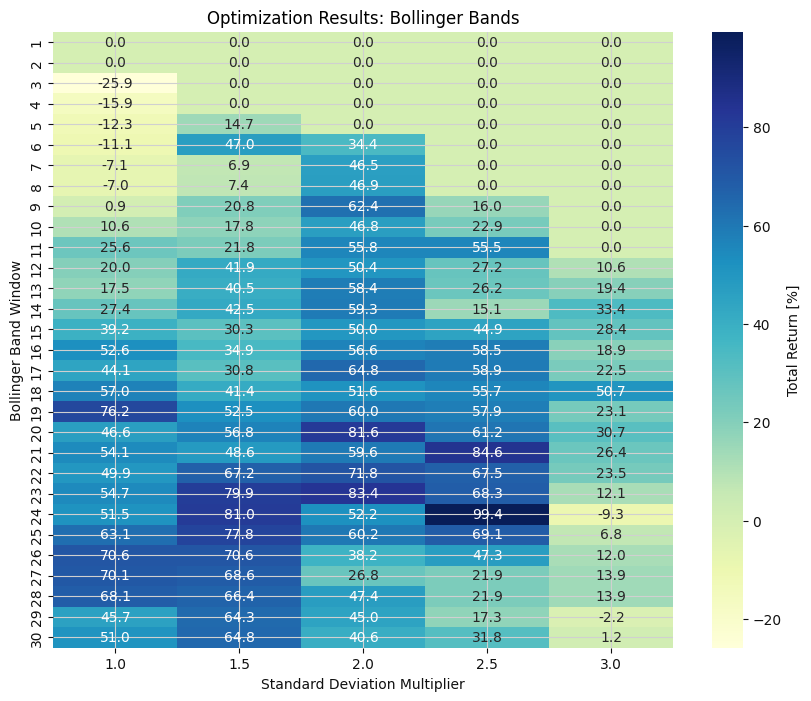

In [ ]:
import yfinance as yf
import vectorbt as vbt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product


def calculate_bollinger_bands(df, window=20, num_std=2):
    """Calculate Bollinger Bands manually."""
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()

    # Upper and lower Bollinger Bands
    df['BB_Upper'] = rolling_mean + (num_std * rolling_std)
    df['BB_Lower'] = rolling_mean - (num_std * rolling_std)
    return df


def optimize_parameters(df, bb_windows, bb_stds):
    """Optimize parameters for Bollinger Bands and collect performance data."""
    results = []

    for bb_window, bb_std in product(bb_windows, bb_stds):
        # Calculate indicators with current parameters
        df = calculate_bollinger_bands(df, window=bb_window, num_std=bb_std)

        # Define entry and exit signals
        df['Entry'] = (
            (df['Close'] < df['BB_Lower'])   # Price below lower Bollinger Band
        )
        df['Exit'] = df['Close'] > df['BB_Upper']  # Exit when price reaches upper Bollinger Band

        # Convert signals to boolean arrays
        entries = df['Entry'].to_numpy()
        exits = df['Exit'].to_numpy()

        # Backtest using vectorbt
        portfolio = vbt.Portfolio.from_signals(
            close=df['Close'],
            entries=entries,
            exits=exits,
            init_cash=100_000,
            fees=0.001
        )

        # Evaluate performance
        stats = portfolio.stats()
        total_return = stats['Total Return [%]']
        results.append({'BB_Window': bb_window, 'BB_Std': bb_std, 'Total_Return': total_return})

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df


def plot_heatmap(results_df):
    """Plot heatmap of optimization results."""
    # Pivot the DataFrame for heatmap
    heatmap_data = results_df.pivot(index='BB_Window', columns='BB_Std', values='Total_Return')

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Total Return [%]'})
    plt.title("Optimization Results: Bollinger Bands")
    plt.xlabel("Standard Deviation Multiplier")
    plt.ylabel("Bollinger Band Window")
    plt.show()


def main():
    # Define the stock symbol and time period
    symbol = 'GC=F'
    start_date = '2014-01-01'
    end_date = '2024-01-01'

    # Download the data
    df = yf.download(symbol, start=start_date, end=end_date)
    df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    df.ffill(inplace=True)

    # Define parameter ranges
    bb_windows = range(1, 31)  # Bollinger Band windows
    bb_stds = [1, 1.5, 2, 2.5, 3]  # Standard deviation multipliers

    # Optimize parameters
    results_df = optimize_parameters(df, bb_windows, bb_stds)

    # Plot heatmap
    plot_heatmap(results_df)


if __name__ == "__main__":
    main()


In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.4 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




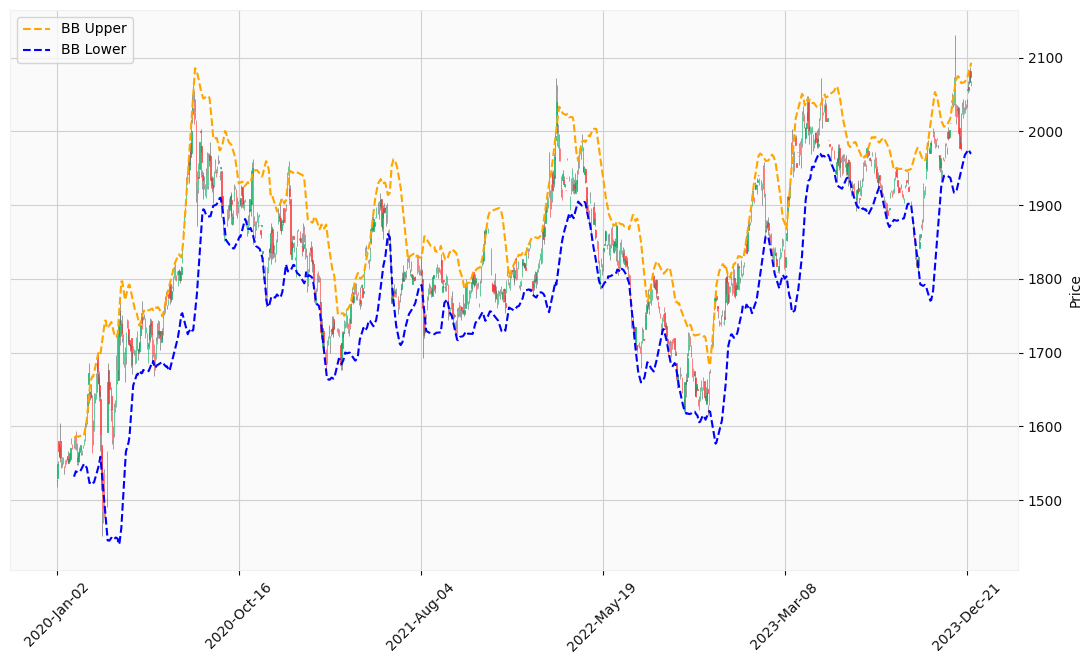

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf

def calculate_bollinger_bands(df, window=20, num_std=2):
    """Calculate Bollinger Bands manually."""
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()

    # Upper and lower Bollinger Bands
    df['BB_Upper'] = rolling_mean + (num_std * rolling_std)
    df['BB_Lower'] = rolling_mean - (num_std * rolling_std)
    return df

def plot_candlestick_with_indicators(df):
    """Plot candlestick chart with Bollinger Bands and Hull Moving Average."""
    # Define additional lines to overlay
    apds = [
        mpf.make_addplot(df['BB_Upper'], color='orange', linestyle='--', width=1.5, label='BB Upper'),
        mpf.make_addplot(df['BB_Lower'], color='blue', linestyle='--', width=1.5, label='BB Lower'),
    ]

    # Plot the chart
    mpf.plot(
        df,
        type='candle',
        style='yahoo',
        addplot=apds,
        ylabel='Price',
        figsize=(14, 8)
    )

def main():
    # Define the stock symbol and time period
    symbol = 'GC=F'
    start_date = '2020-01-01'
    end_date = '2024-01-01'

    # Download the data
    df = yf.download(symbol, start=start_date, end=end_date)
    df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    df.ffill(inplace=True)

    # Calculate Bollinger Bands
    df = calculate_bollinger_bands(df, window=20, num_std=2)

    # Plot candlestick chart with indicators
    plot_candlestick_with_indicators(df)

if __name__ == "__main__":
    main()
